# Introduction

### Libraries

In [43]:
# for scientific computing with Python
import pandas as pd
import numpy as np
import os as os


## Load Data

In [44]:
os.getcwd()
hofstedeDf = pd.read_csv('HofstedePatterns.csv', sep=',')
print(hofstedeDf.describe(include='all'))

covidDf = pd.read_csv('../DataAnalytics/Data/Covid_20200604.csv', sep=',')
print(covidDf.describe(include='all'))

Country  CovidName     PowerDx  Individuality  Masculinity  \
count          53         53   53.000000      53.000000    53.000000   
unique         53         53         NaN            NaN          NaN   
top     Singapore  Singapore         NaN            NaN          NaN   
freq            1          1         NaN            NaN          NaN   
mean          NaN        NaN   55.283019      44.528302    50.301887   
std           NaN        NaN   21.665621      25.537005    18.455336   
min           NaN        NaN   11.000000       6.000000     5.000000   
25%           NaN        NaN   36.000000      20.000000    42.000000   
50%           NaN        NaN   58.000000      41.000000    50.000000   
75%           NaN        NaN   68.000000      68.000000    64.000000   
max           NaN        NaN  104.000000      91.000000    95.000000   

               UAE  
count    53.000000  
unique         NaN  
top            NaN  
freq           NaN  
mean     65.433962  
std      24.440280 

## Join

In [45]:
combinedDf = pd.concat([covidDf.set_index('Country'),hofstedeDf.set_index('Country')],axis=1, join='inner')
combinedDf.describe()

,TotalCases,TotalDeaths,CasesPer1M,DeathsPer1M,TotalTests,TestsPer1M,Population,PowerDx,Individuality,Masculinity,UAE
count,48.000000,48.000000,48.000000,48.000000,4.800000e+01,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000
mean,66467.083333,4522.041667,1813.562500,117.672917,8.471007e+05,30663.666667,7.356284e+07,55.833333,43.479167,49.979167,66.708333
std,105883.408014,8511.215097,1884.535971,182.458829,1.117800e+06,28171.649600,2.015134e+08,21.979036,24.366868,19.099392,24.676596
min,443.000000,4.000000,19.000000,0.300000,1.361600e+04,1345.000000,2.960223e+06,11.000000,6.000000,5.000000,8.000000
25%,6623.250000,136.000000,276.000000,6.750000,2.011710e+05,5861.000000,8.360530e+06,37.500000,20.000000,41.500000,49.000000
50%,25079.500000,942.000000,1016.500000,38.000000,4.089725e+05,21666.500000,2.145877e+07,58.000000,40.000000,50.000000,70.000000
75%,87373.000000,4680.250000,2749.750000,144.500000,9.463902e+05,48522.750000,6.166682e+07,68.000000,67.250000,64.000000,86.000000
max,590485.000000,33689.000000,6315.000000,824.000000,4.348880e+06,115971.000000,1.378974e+09,104.000000,90.000000,95.000000,112.000000


In [46]:
ind = combinedDf['Individuality']
pdx = combinedDf['PowerDx']
masc = combinedDf['Masculinity']
uae = combinedDf['UAE']
per1M = combinedDf['CasesPer1M']
deathsPer1M = combinedDf['DeathsPer1M']
pop = combinedDf['Population']

## Scatter


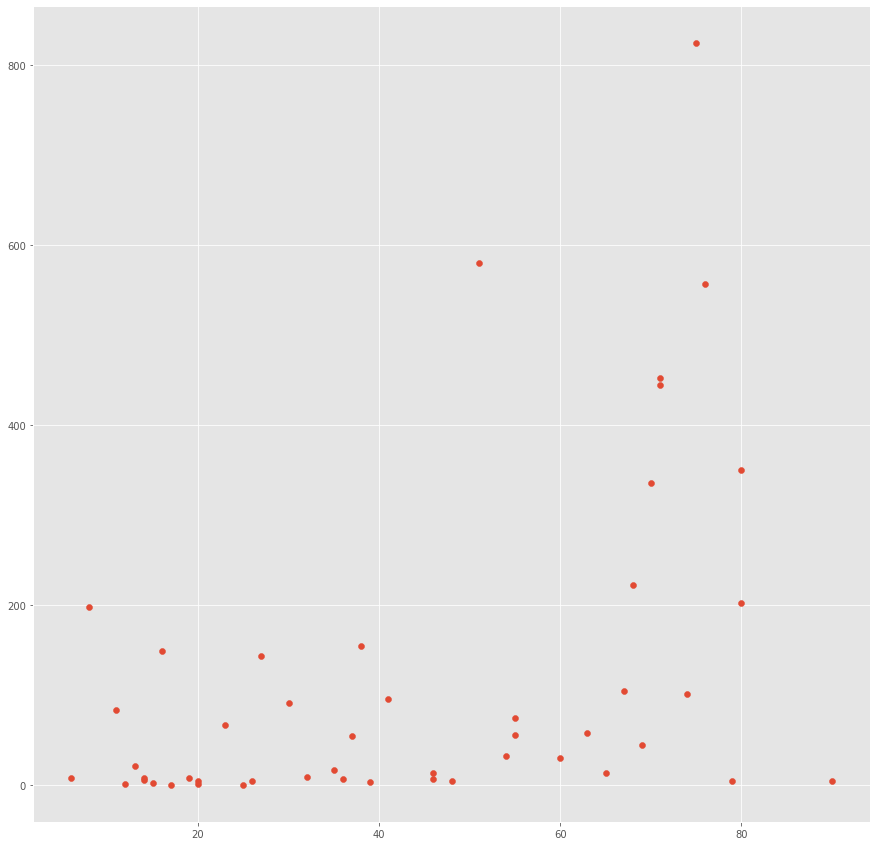

In [47]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.scatter(ind, deathsPer1M)
plt.show()

## Correlation

In [48]:
np.corrcoef(ind, deathsPer1M)

array([[1.        , 0.45987644],
       [0.45987644, 1.        ]])

In [49]:
oecdDf = pd.read_csv('../DataAnalytics/Data/OECD_QualityOfLife.csv', sep=',')
print(oecdDf.describe(include='all'))

Country  HofstederPowerDx  HofstederIndividuality  \
count        24         24.000000               24.000000   
unique       24               NaN                     NaN   
top     Ireland               NaN                     NaN   
freq          1               NaN                     NaN   
mean        NaN         40.750000               65.208333   
std         NaN         15.492635               18.897847   
min         NaN         11.000000               18.000000   
25%         NaN         31.000000               58.750000   
50%         NaN         37.000000               69.500000   
75%         NaN         54.750000               76.750000   
max         NaN         68.000000               91.000000   

        HofstederMasculinity  HofstederUncertaintyAvoidance  \
count              24.000000                      24.000000   
unique                   NaN                            NaN   
top                      NaN                            NaN   
freq                   

In [50]:
oecdCombinedDf = pd.concat([covidDf.set_index('Country'),oecdDf.set_index('Country')],axis=1, join='inner')
oecdCombinedDf.describe()

,TotalCases,TotalDeaths,CasesPer1M,DeathsPer1M,TotalTests,TestsPer1M,Population,HofstederPowerDx,HofstederIndividuality,HofstederMasculinity,...,Theftfromcar,Motorcycletheft,Bicycletheft,Assaultsandthreats,Sexualincidents,Burglaries,Robberies,PISAMath,PISAScience,PISAReading
count,21.000000,21.000000,21.000000,21.000000,2.100000e+01,21.000000,2.100000e+01,21.000000,21.000000,21.000000,...,16.000000,16.000000,16.000000,16.000000,16.00000,16.00000,16.000000,21.000000,21.000000,21.00000
mean,60334.571429,6402.142857,2876.476190,225.190476,1.087748e+06,62036.285714,2.622324e+07,40.142857,65.095238,46.428571,...,4.556250,0.437500,3.912500,3.281250,2.29375,1.85625,0.931250,499.571429,500.857143,500.52381
std,83000.220086,10355.166128,1960.358656,231.618354,1.368872e+06,41585.593354,3.301034e+07,15.982133,15.417214,25.615564,...,2.285598,0.396443,2.120338,1.715505,1.01026,1.12722,0.667052,16.092145,18.992856,15.41953
min,1504.000000,10.000000,134.000000,4.000000,6.135500e+04,2374.000000,3.410790e+05,11.000000,27.000000,5.000000,...,1.600000,0.000000,0.800000,0.400000,0.60000,0.30000,0.100000,454.000000,455.000000,467.00000
25%,7240.000000,238.000000,1567.000000,44.000000,2.755000e+05,35270.000000,5.540104e+06,31.000000,60.000000,26.000000,...,2.875000,0.175000,2.225000,2.325000,1.57500,1.07500,0.675000,492.000000,493.000000,492.00000
50%,25111.000000,1455.000000,2484.000000,143.000000,4.094500e+05,52370.000000,1.019877e+07,36.000000,69.000000,52.000000,...,4.400000,0.300000,3.500000,3.300000,2.25000,1.65000,0.850000,497.000000,502.000000,500.00000
75%,58767.000000,7635.000000,4149.000000,350.000000,1.384633e+06,77705.000000,3.771722e+07,54.000000,75.000000,66.000000,...,5.825000,0.625000,5.325000,4.200000,2.77500,2.32500,1.100000,511.000000,509.000000,509.00000
max,287406.000000,33689.000000,6441.000000,824.000000,4.348880e+06,179885.000000,1.265033e+08,68.000000,90.000000,95.000000,...,9.600000,1.500000,7.200000,6.400000,4.00000,4.30000,3.100000,532.000000,538.000000,527.00000


In [51]:
oecdCombinedDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Luxembourg to Japan
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TotalCases                     21 non-null     int64  
 1   TotalDeaths                    21 non-null     int64  
 2   CasesPer1M                     21 non-null     int64  
 3   DeathsPer1M                    21 non-null     float64
 4   TotalTests                     21 non-null     int64  
 5   TestsPer1M                     21 non-null     int64  
 6   Population                     21 non-null     int64  
 7   HofstederPowerDx               21 non-null     int64  
 8   HofstederIndividuality         21 non-null     int64  
 9   HofstederMasculinity           21 non-null     int64  
 10  HofstederUncertaintyAvoidance  21 non-null     int64  
 11  HofstederLongtermOrientation   21 non-null     int64  
 12  HofstederIndulgence            21 non-null   

In [52]:
ind2 = oecdCombinedDf['HofstederIndividuality']
pdx2 = oecdCombinedDf['HofstederPowerDx']
masc2 = oecdCombinedDf['HofstederMasculinity']
uae2 = oecdCombinedDf['HofstederUncertaintyAvoidance']
lto = oecdCombinedDf['HofstederLongtermOrientation']
indulgence = oecdCombinedDf['HofstederIndulgence']
per1M2 = oecdCombinedDf['CasesPer1M']
deathsPer1M2 = oecdCombinedDf['DeathsPer1M']
pop2 = oecdCombinedDf['Population']

In [53]:
oecdCombinedDf.corr()

,TotalCases,TotalDeaths,CasesPer1M,DeathsPer1M,TotalTests,TestsPer1M,Population,HofstederPowerDx,HofstederIndividuality,HofstederMasculinity,...,Theftfromcar,Motorcycletheft,Bicycletheft,Assaultsandthreats,Sexualincidents,Burglaries,Robberies,PISAMath,PISAScience,PISAReading
TotalCases,1.000000,0.902517,0.334136,0.586219,0.918150,-0.051786,0.521363,0.411255,0.051546,0.151544,...,0.675676,0.558632,-0.480704,-0.191615,-0.301261,-0.059019,0.806860,-0.098112,-0.090491,-0.033262
TotalDeaths,0.902517,1.000000,0.305506,0.687317,0.734128,-0.094627,0.456456,0.515617,0.135959,0.107582,...,0.591491,0.558918,-0.452898,-0.175984,-0.367483,-0.064011,0.644481,-0.154412,-0.179644,-0.123924
CasesPer1M,0.334136,0.305506,1.000000,0.622410,0.173665,0.607271,-0.244959,0.142889,-0.034501,-0.204967,...,0.344043,0.242861,-0.234915,-0.272758,-0.356845,-0.210666,0.673337,-0.129312,-0.359752,-0.250407
DeathsPer1M,0.586219,0.687317,0.622410,1.000000,0.375386,-0.011030,0.068129,0.474632,0.214170,-0.039682,...,0.359548,0.332729,-0.167409,-0.156097,-0.412103,-0.089566,0.548582,-0.008093,-0.146080,-0.073977
TotalTests,0.918150,0.734128,0.173665,0.375386,1.000000,0.003141,0.534113,0.269159,0.114831,0.251803,...,0.740260,0.562143,-0.571766,-0.117898,-0.164264,0.169002,0.796555,-0.075807,-0.022783,0.009086
TestsPer1M,-0.051786,-0.094627,0.607271,-0.011030,0.003141,1.000000,-0.412305,-0.204631,-0.021114,-0.284661,...,0.323271,0.089411,-0.347165,0.024107,-0.047934,0.404961,0.429481,-0.222657,-0.385818,-0.332741
Population,0.521363,0.456456,-0.244959,0.068129,0.534113,-0.412305,1.000000,0.406373,-0.084693,0.507356,...,0.074019,0.578272,-0.021202,-0.383370,-0.417652,-0.136444,0.060226,0.325499,0.357632,0.220151
HofstederPowerDx,0.411255,0.515617,0.142889,0.474632,0.269159,-0.204631,0.406373,1.000000,-0.379319,0.126494,...,0.301203,0.296612,-0.455414,-0.302012,-0.758203,-0.225192,0.446375,-0.237126,-0.156248,-0.181501
HofstederIndividuality,0.051546,0.135959,-0.034501,0.214170,0.114831,-0.021114,-0.084693,-0.379319,1.000000,-0.092785,...,0.183029,-0.086880,0.236403,0.696074,0.421594,0.550778,-0.069337,0.341573,0.287088,0.361961
HofstederMasculinity,0.151544,0.107582,-0.204967,-0.039682,0.251803,-0.284661,0.507356,0.126494,-0.092785,1.000000,...,-0.104595,0.153849,-0.196084,-0.263899,-0.098305,0.095379,-0.134918,0.151605,0.199921,-0.021610


In [54]:
np.corrcoef(ind2, deathsPer1M2)

array([[1.        , 0.21416979],
       [0.21416979, 1.        ]])

In [55]:
np.corrcoef(pdx2, deathsPer1M2)

array([[1.        , 0.47463197],
       [0.47463197, 1.        ]])

In [56]:

np.corrcoef(lto, deathsPer1M2)

array([[1.        , 0.35987699],
       [0.35987699, 1.        ]])

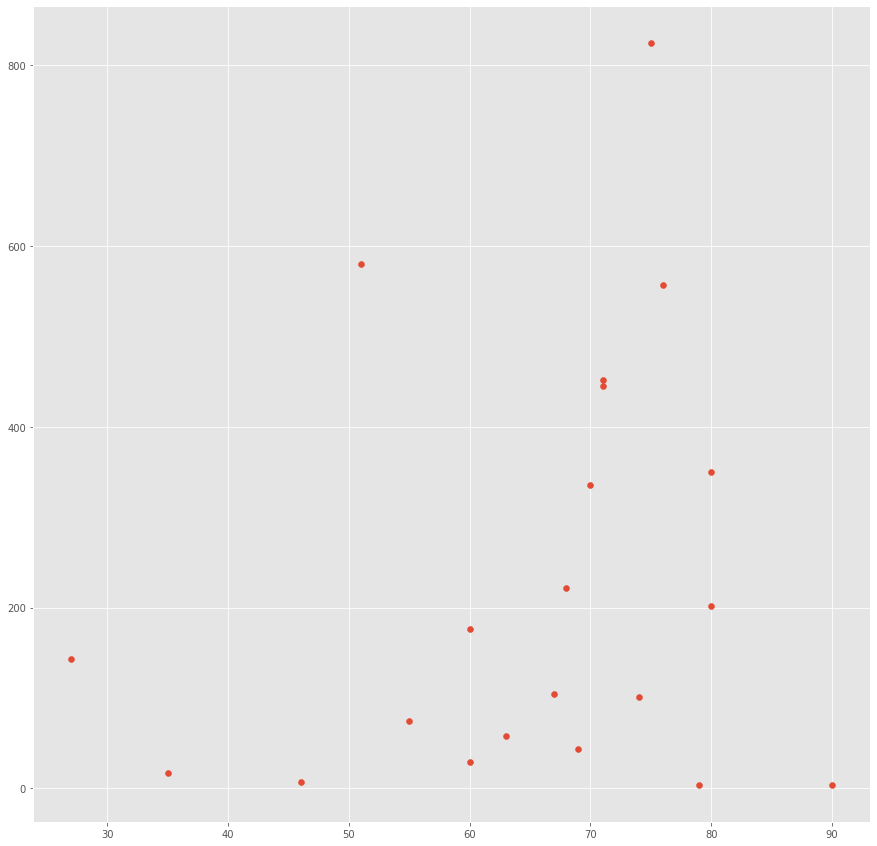

In [57]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
plt.figure(figsize=(15,15))
plt.scatter(ind2, deathsPer1M2)
plt.show()

In [58]:
trimmedDf = oecdCombinedDf.drop(oecdCombinedDf.iloc[:,18:44], axis=1, inplace=False)


In [59]:
trimmedDf.head()

,TotalCases,TotalDeaths,CasesPer1M,DeathsPer1M,TotalTests,TestsPer1M,Population,HofstederPowerDx,HofstederIndividuality,HofstederMasculinity,HofstederUncertaintyAvoidance,HofstederLongtermOrientation,HofstederIndulgence,Patents,PatentsPerCapita,Diversity_Ethnic,Diversity_Linguistic,Diversity_Religious,PISAReading
Country,,,,,,,,,,,,,,,,,,,
Luxembourg,4027,110,6441,176.0,82377,131767,625170,40,60,50,70,64,56,62,36,0.53,0.64,0.09,481
Spain,287406,27128,6147,580.0,4063843,86921,46753492,57,51,42,86,48,44,912,67,0.42,0.41,0.45,496
Iceland,1806,10,5295,29.0,61355,179885,341079,30,60,10,50,28,67,59,197,0.08,0.08,0.19,482
Ireland,25111,1659,5090,336.0,348416,70622,4933560,28,70,68,35,24,65,515,193,0.12,0.03,0.16,521
Belgium,58767,9548,5072,824.0,900282,77705,11585939,65,75,54,94,82,57,1225,50,0.56,0.54,0.21,499


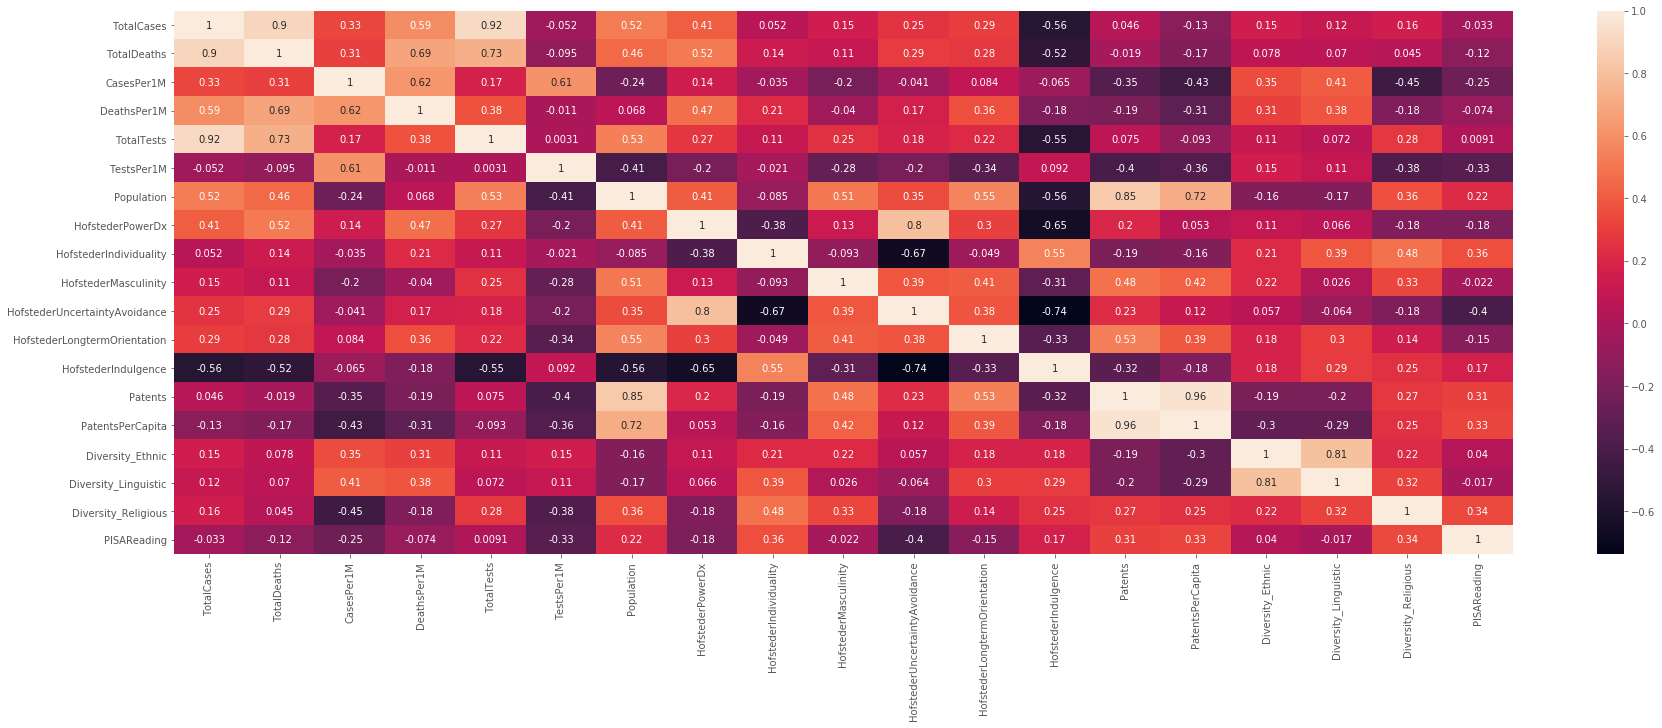

In [60]:
import seaborn as sn
corrMatrix = trimmedDf.corr()
plt.figure(figsize=(30,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [61]:
trimmedDf.corr()

,TotalCases,TotalDeaths,CasesPer1M,DeathsPer1M,TotalTests,TestsPer1M,Population,HofstederPowerDx,HofstederIndividuality,HofstederMasculinity,HofstederUncertaintyAvoidance,HofstederLongtermOrientation,HofstederIndulgence,Patents,PatentsPerCapita,Diversity_Ethnic,Diversity_Linguistic,Diversity_Religious,PISAReading
TotalCases,1.000000,0.902517,0.334136,0.586219,0.918150,-0.051786,0.521363,0.411255,0.051546,0.151544,0.253628,0.294289,-0.557541,0.046419,-0.133977,0.151489,0.115069,0.155929,-0.033262
TotalDeaths,0.902517,1.000000,0.305506,0.687317,0.734128,-0.094627,0.456456,0.515617,0.135959,0.107582,0.292082,0.276020,-0.516794,-0.019468,-0.168320,0.077927,0.069548,0.044730,-0.123924
CasesPer1M,0.334136,0.305506,1.000000,0.622410,0.173665,0.607271,-0.244959,0.142889,-0.034501,-0.204967,-0.041331,0.084013,-0.065176,-0.349450,-0.434491,0.352308,0.407573,-0.449690,-0.250407
DeathsPer1M,0.586219,0.687317,0.622410,1.000000,0.375386,-0.011030,0.068129,0.474632,0.214170,-0.039682,0.167829,0.359877,-0.175971,-0.194148,-0.314718,0.305191,0.377600,-0.176181,-0.073977
TotalTests,0.918150,0.734128,0.173665,0.375386,1.000000,0.003141,0.534113,0.269159,0.114831,0.251803,0.184576,0.216899,-0.550349,0.074940,-0.092544,0.113679,0.072195,0.275454,0.009086
TestsPer1M,-0.051786,-0.094627,0.607271,-0.011030,0.003141,1.000000,-0.412305,-0.204631,-0.021114,-0.284661,-0.202530,-0.339745,0.092237,-0.402185,-0.364145,0.154991,0.107788,-0.376203,-0.332741
Population,0.521363,0.456456,-0.244959,0.068129,0.534113,-0.412305,1.000000,0.406373,-0.084693,0.507356,0.349514,0.553139,-0.564953,0.847937,0.716778,-0.157694,-0.167101,0.358585,0.220151
HofstederPowerDx,0.411255,0.515617,0.142889,0.474632,0.269159,-0.204631,0.406373,1.000000,-0.379319,0.126494,0.801970,0.304903,-0.650156,0.203263,0.052563,0.107278,0.065722,-0.177010,-0.181501
HofstederIndividuality,0.051546,0.135959,-0.034501,0.214170,0.114831,-0.021114,-0.084693,-0.379319,1.000000,-0.092785,-0.669393,-0.049041,0.550643,-0.190928,-0.161165,0.213804,0.387391,0.483523,0.361961
HofstederMasculinity,0.151544,0.107582,-0.204967,-0.039682,0.251803,-0.284661,0.507356,0.126494,-0.092785,1.000000,0.386039,0.407746,-0.308701,0.477870,0.424334,0.218806,0.025854,0.331737,-0.021610


In [63]:
trimmedDf2 = oecdCombinedDf.drop(oecdCombinedDf.iloc[:,32:41], axis=1, inplace=False)

In [64]:
trimmedDf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Luxembourg to Japan
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TotalCases                     21 non-null     int64  
 1   TotalDeaths                    21 non-null     int64  
 2   CasesPer1M                     21 non-null     int64  
 3   DeathsPer1M                    21 non-null     float64
 4   TotalTests                     21 non-null     int64  
 5   TestsPer1M                     21 non-null     int64  
 6   Population                     21 non-null     int64  
 7   HofstederPowerDx               21 non-null     int64  
 8   HofstederIndividuality         21 non-null     int64  
 9   HofstederMasculinity           21 non-null     int64  
 10  HofstederUncertaintyAvoidance  21 non-null     int64  
 11  HofstederLongtermOrientation   21 non-null     int64  
 12  HofstederIndulgence            21 non-null   

In [73]:
trimmedDf2 = trimmedDf2.drop(trimmedDf2.columns[[0,1,4,5,6,18,26]], axis=1)

In [75]:
trimmedDf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, Luxembourg to Japan
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HofstederPowerDx        21 non-null     int64  
 1   HofstederIndividuality  21 non-null     int64  
 2   HofstederIndulgence     21 non-null     int64  
 3   Patents                 21 non-null     int64  
 4   PatentsPerCapita        21 non-null     int64  
 5   Diversity_Ethnic        21 non-null     float64
 6   Diversity_Linguistic    21 non-null     float64
 7   Diversity_Religious     21 non-null     float64
 8   Protestantism           21 non-null     float64
 9   Religiosity             5 non-null      float64
 10  IQ                      21 non-null     int64  
 11  Gini                    21 non-null     float64
 12  Employment              21 non-null     float64
 13  EduReading              21 non-null     float64
 14  EduScience              21 non-null  

In [76]:
trimmedDf2.corr()

,HofstederPowerDx,HofstederIndividuality,HofstederIndulgence,Patents,PatentsPerCapita,Diversity_Ethnic,Diversity_Linguistic,Diversity_Religious,Protestantism,Religiosity,...,EduReading,EduScience,TertiaryEdu,LifeExpectancy,InfantDeath,Obesity,HoursWorked,PISAMath,PISAScience,PISAReading
HofstederPowerDx,1.000000,-0.379319,-0.650156,0.203263,0.052563,0.107278,0.065722,-0.177010,-0.579858,-0.709234,...,-0.316748,-0.308022,0.082642,0.075216,-0.042150,-0.121270,0.135544,-0.237126,-0.156248,-0.181501
HofstederIndividuality,-0.379319,1.000000,0.550643,-0.190928,-0.161165,0.213804,0.387391,0.483523,0.319483,0.712218,...,0.483316,0.408829,0.269458,0.139650,0.208206,0.307812,-0.351636,0.341573,0.287088,0.361961
HofstederIndulgence,-0.650156,0.550643,1.000000,-0.319362,-0.176632,0.179508,0.288459,0.248863,0.528019,0.240409,...,0.485839,0.410425,0.323716,0.010002,0.134279,0.303098,0.023979,0.156872,0.128560,0.165671
Patents,0.203263,-0.190928,-0.319362,1.000000,0.955060,-0.194454,-0.200875,0.274370,-0.214175,-0.555349,...,0.160755,0.410619,0.398411,0.537884,-0.356007,-0.465356,0.092404,0.522749,0.511722,0.310387
PatentsPerCapita,0.052563,-0.161165,-0.176632,0.955060,1.000000,-0.296789,-0.294903,0.249911,-0.060403,-0.571091,...,0.270760,0.503320,0.425860,0.531576,-0.418852,-0.439070,0.170313,0.526399,0.533429,0.325154
Diversity_Ethnic,0.107278,0.213804,0.179508,-0.194454,-0.296789,1.000000,0.805785,0.219705,-0.236173,0.711839,...,-0.098193,-0.111237,0.176736,0.018284,0.299501,0.333163,0.127291,0.102429,0.111430,0.039765
Diversity_Linguistic,0.065722,0.387391,0.288459,-0.200875,-0.294903,0.805785,1.000000,0.316198,-0.186144,0.701799,...,-0.114439,-0.043525,0.137112,0.083288,0.372239,0.342839,-0.148327,0.199550,0.137884,-0.016832
Diversity_Religious,-0.177010,0.483523,0.248863,0.274370,0.249911,0.219705,0.316198,1.000000,-0.060357,0.226508,...,0.427411,0.574835,0.190428,0.391531,0.101204,0.200401,0.029758,0.386130,0.532143,0.338918
Protestantism,-0.579858,0.319483,0.528019,-0.214175,-0.060403,-0.236173,-0.186144,-0.060357,1.000000,0.552606,...,0.374208,0.229488,0.263991,0.043475,-0.437069,0.008994,-0.154526,0.177184,0.129583,0.275476
Religiosity,-0.709234,0.712218,0.240409,-0.555349,-0.571091,0.711839,0.701799,0.226508,0.552606,1.000000,...,0.016509,-0.281545,-0.237756,-0.273795,0.729758,0.661820,0.142411,-0.176175,-0.141375,0.086628


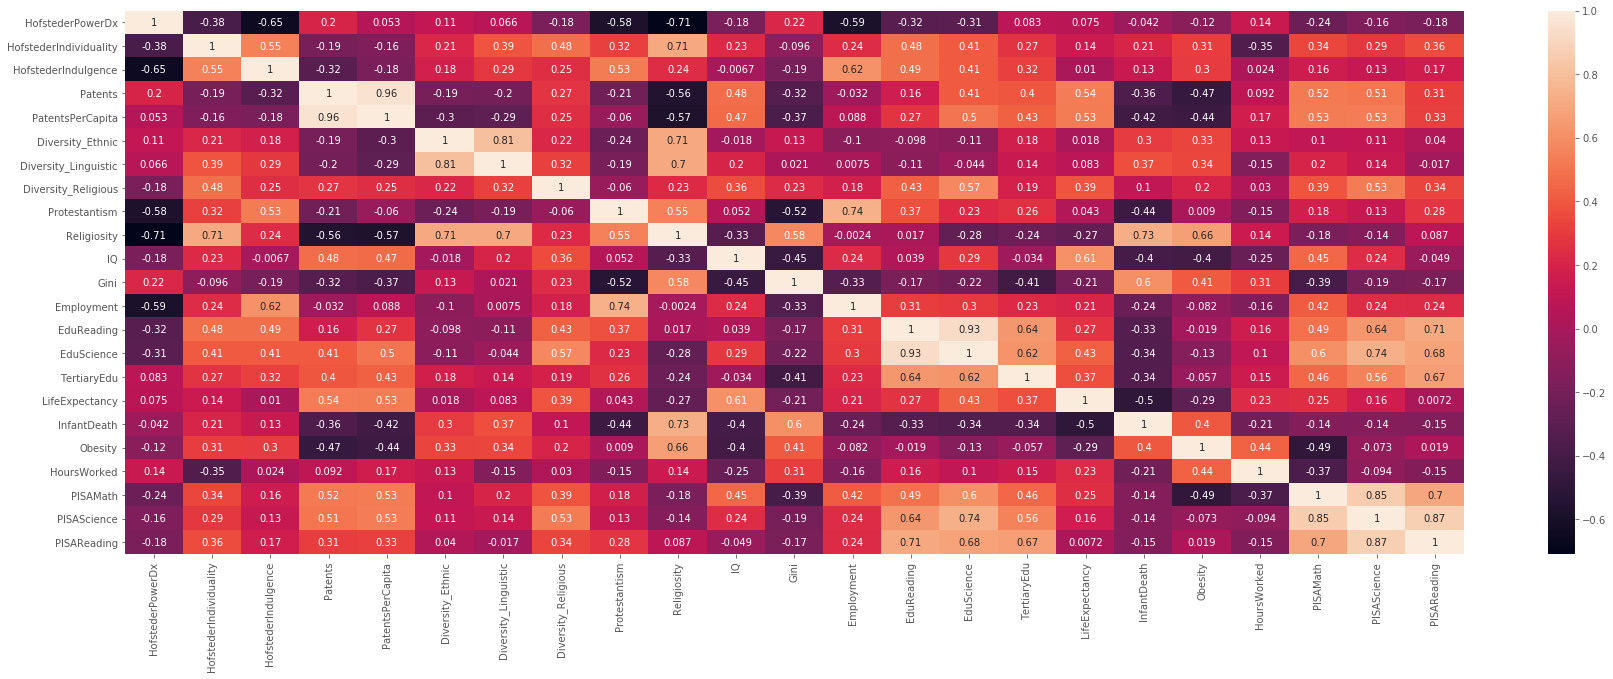

In [77]:
corrMatrix3 = trimmedDf2.corr()
plt.figure(figsize=(30,10))
sn.heatmap(corrMatrix3, annot=True)
plt.show()

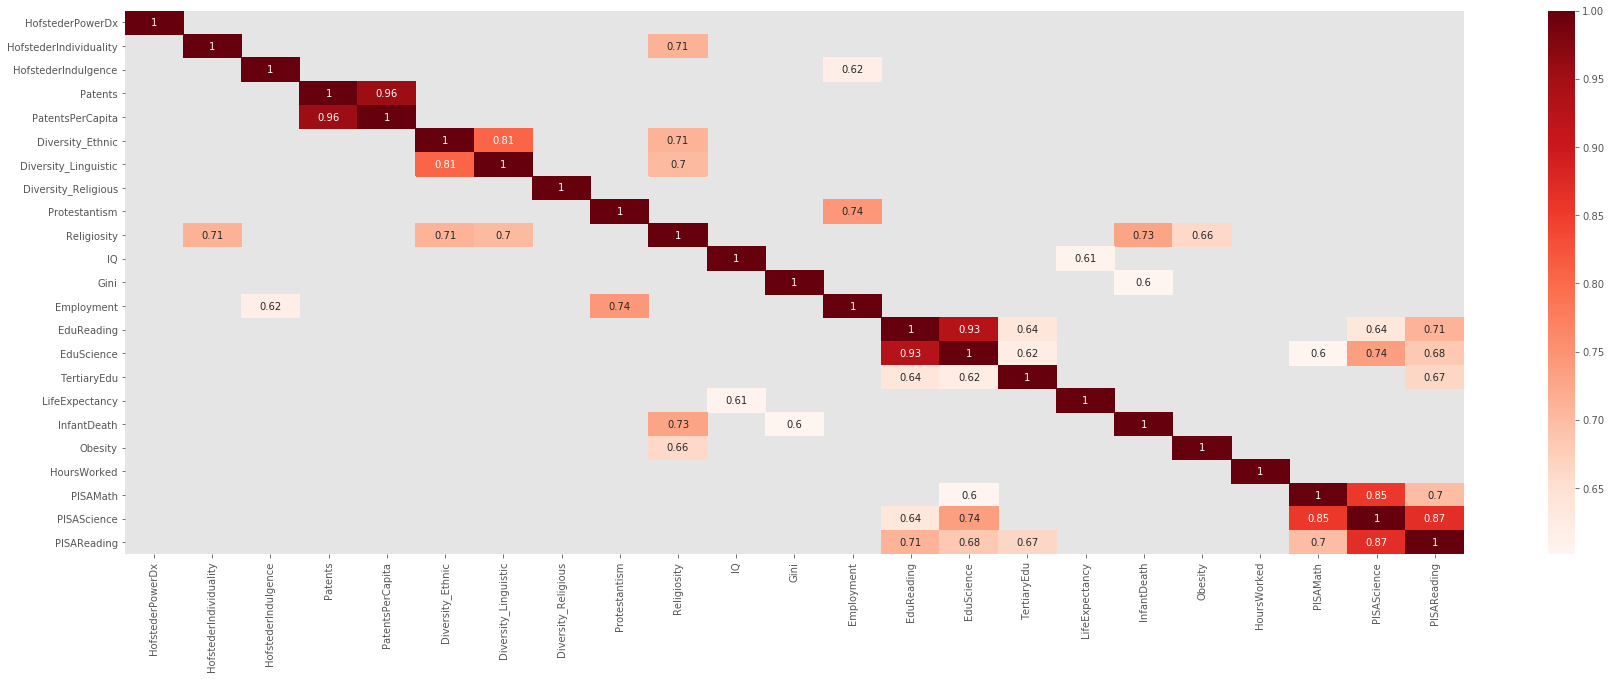

In [78]:
filteredCorrMatrix3 = corrMatrix3[corrMatrix3 >=.6]
plt.figure(figsize=(30,10))
sn.heatmap(filteredCorrMatrix3, annot=True, cmap="Reds")
plt.show()

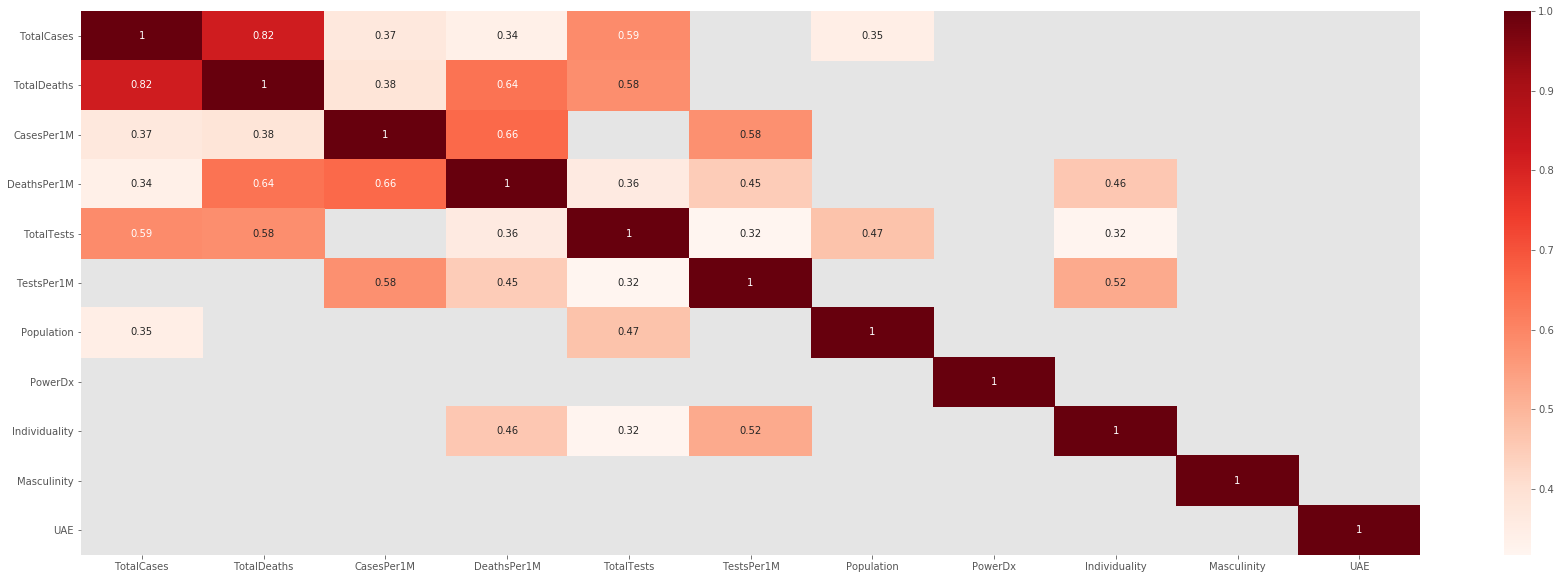

In [83]:
corrMatrix4 = combinedDf.corr()
filteredCorrMatrix4 = corrMatrix4[corrMatrix4 >=.3]
plt.figure(figsize=(30,10))
sn.heatmap(filteredCorrMatrix4, annot=True, cmap="Reds")
plt.show()

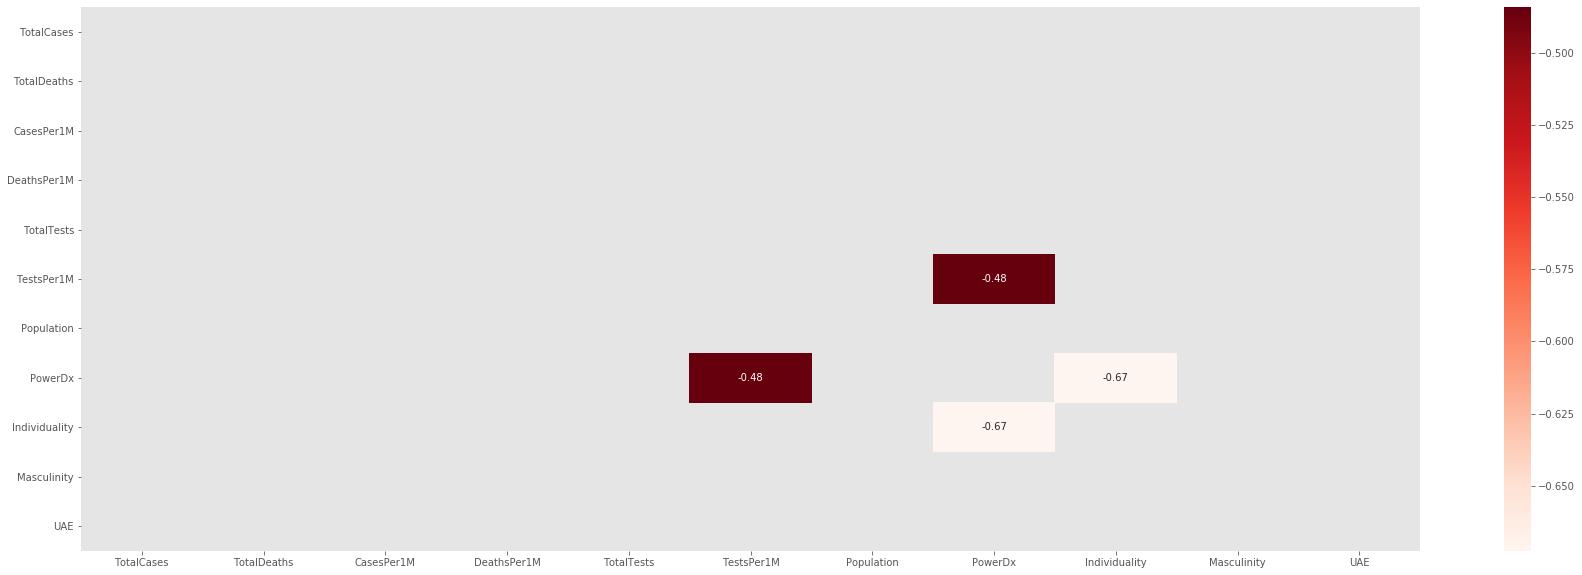

In [84]:
corrMatrix4 = combinedDf.corr()
filteredCorrMatrix4 = corrMatrix4[corrMatrix4 <=-.3]
plt.figure(figsize=(30,10))
sn.heatmap(filteredCorrMatrix4, annot=True, cmap="Reds")
plt.show()

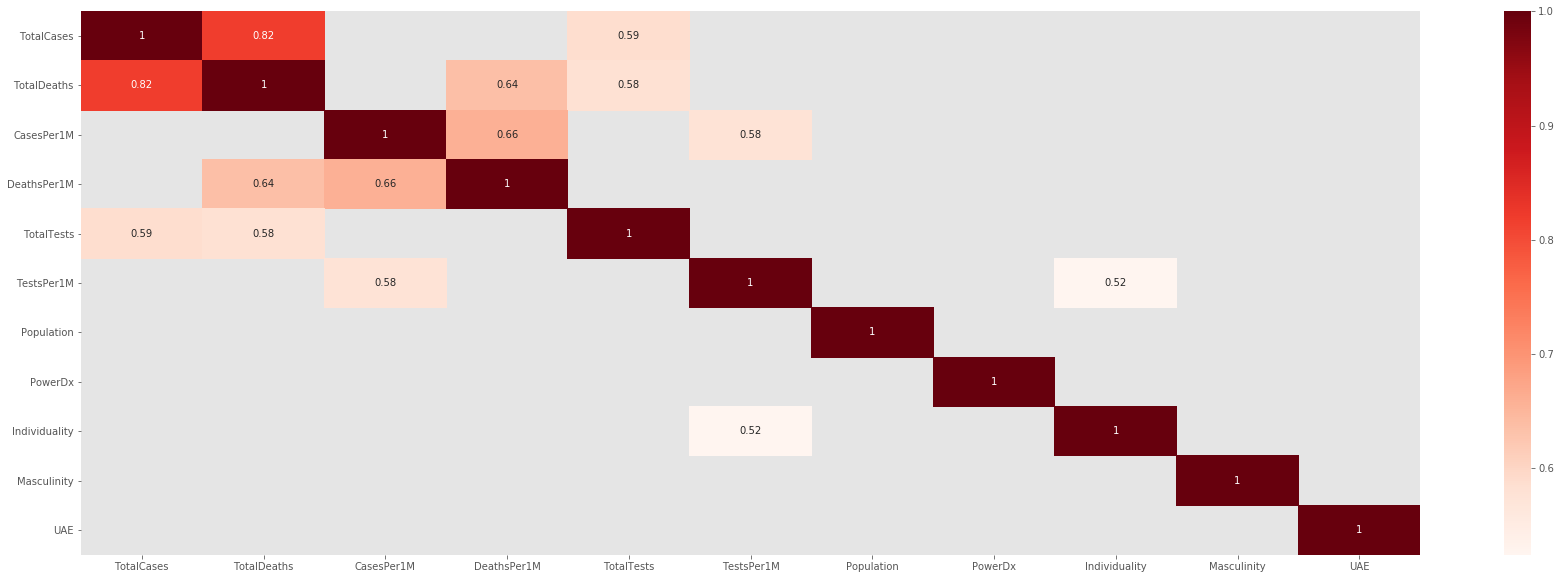

In [98]:
corrMatrix5 = combinedDf.corr()
part1 = corrMatrix5[corrMatrix5 >=.5]
part2 = corrMatrix5[corrMatrix5 <=-.5]

plt.figure(figsize=(30,10))
sn.heatmap(part1, annot=True, cmap="Reds")
plt.show()

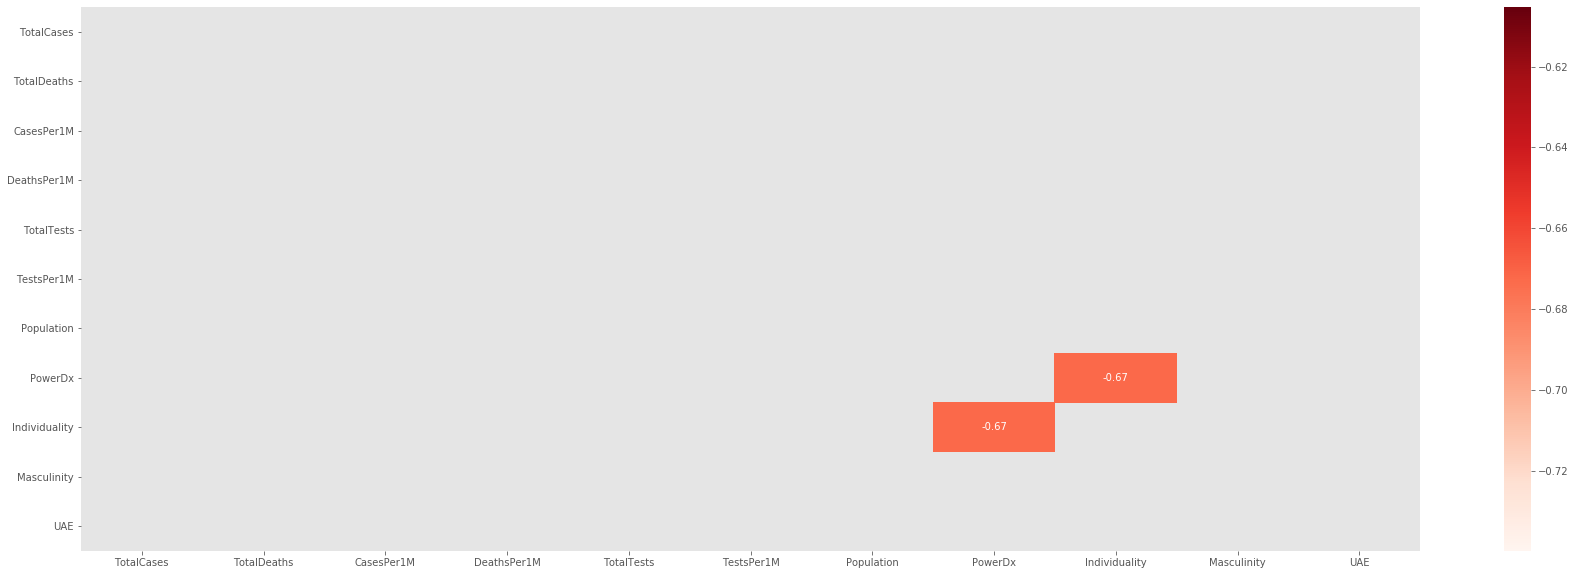

In [99]:
plt.figure(figsize=(30,10))
sn.heatmap(part2, annot=True, cmap="Reds")
plt.show()